In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('state_action_data.csv')
df

,day,hour,storage,price,daily_avg,weekly_avg,action,reward
0,1.0,1.0,0.0,13.20,30.100000,30.100000,buy,2.76
1,1.0,2.0,10.0,13.14,24.446667,24.446667,buy,2.66
2,1.0,3.0,20.0,11.83,21.292500,21.292500,buy,2.64
3,1.0,4.0,30.0,9.49,18.932000,18.932000,buy,2.70
4,1.0,5.0,40.0,8.63,17.215000,17.215000,buy,2.70
...,...,...,...,...,...,...,...,...
17491,729.0,20.0,110.0,55.76,40.475000,42.841815,hold,0.00
17492,729.0,21.0,110.0,50.21,40.692083,42.833065,hold,0.00
17493,729.0,22.0,110.0,43.13,40.811250,42.821161,hold,0.00
17494,729.0,23.0,110.0,46.62,40.931250,42.806280,hold,0.00


In [6]:
df[(df['price'] > 150)]

,day,hour,storage,price,daily_avg,weekly_avg,action,reward
273,12.0,10.0,0.0,195.56,68.566667,45.021270,buy,-1.00
274,12.0,11.0,10.0,179.58,68.566667,45.021270,sell,5.33
275,12.0,12.0,0.0,158.11,68.566667,45.021270,buy,-1.00
7041,294.0,10.0,70.0,154.99,73.230417,55.477560,sell,5.33
7159,299.0,8.0,70.0,211.53,75.217500,59.964554,sell,5.33
8034,335.0,19.0,70.0,190.68,69.445417,56.523214,buy,-1.00
8058,336.0,19.0,80.0,252.11,68.304583,57.487143,buy,-1.00
10831,452.0,8.0,10.0,2999.00,31.470000,52.533214,sell,5.33


In [7]:
day_12 = df[(df['day'] == 12)]
day_12

,day,hour,storage,price,daily_avg,weekly_avg,action,reward
264,12.0,1.0,0.0,63.20,60.009583,44.348692,hold,0.00
265,12.0,2.0,0.0,67.27,60.898750,44.445000,hold,0.00
266,12.0,3.0,0.0,61.85,61.972083,44.517824,hold,0.00
267,12.0,4.0,0.0,55.00,62.972083,44.561500,buy,0.25
268,12.0,5.0,10.0,53.02,63.893333,44.596598,buy,0.30
269,12.0,6.0,20.0,60.29,65.117917,44.661446,hold,0.00
270,12.0,7.0,20.0,75.00,66.688333,44.786296,hold,0.00
271,12.0,8.0,20.0,102.12,68.566667,45.021270,sell,0.10
272,12.0,9.0,10.0,143.28,68.566667,45.021270,sell,5.33
273,12.0,10.0,0.0,195.56,68.566667,45.021270,buy,-1.00


In [13]:
def plot_behaviour(df_day, day):
    action_colors = {
        'hold': 'gray',
        'buy':  'red',
        'sell': 'blue'
    }
    fig, ax = plt.subplots(figsize=(12, 6))

    for action in df_day['action'].unique():
        subset = df_day[df_day['action'] == action]
        ax.scatter(subset['hour'], subset['price'], 
                color=action_colors[action], 
                label=action, 
                s=40, alpha=0.8)

    ax.plot(df_day['hour'], df_day['daily_avg'], color='green', label='daily_avg', linewidth=2)
    ax.plot(df_day['hour'], df_day['weekly_avg'], color='pink',  label='weekly_avg', linewidth=2)

    ax.set_xlabel('Hour')
    ax.set_ylabel('Price')
    ax.set_title(f'TQN behaviour during day {day}')
    ax.grid(alpha=0.3)
    ax.set_xticks(range(1, 25))
    ax.set_xlim(1, 24)
    ax.legend()

    plt.show()


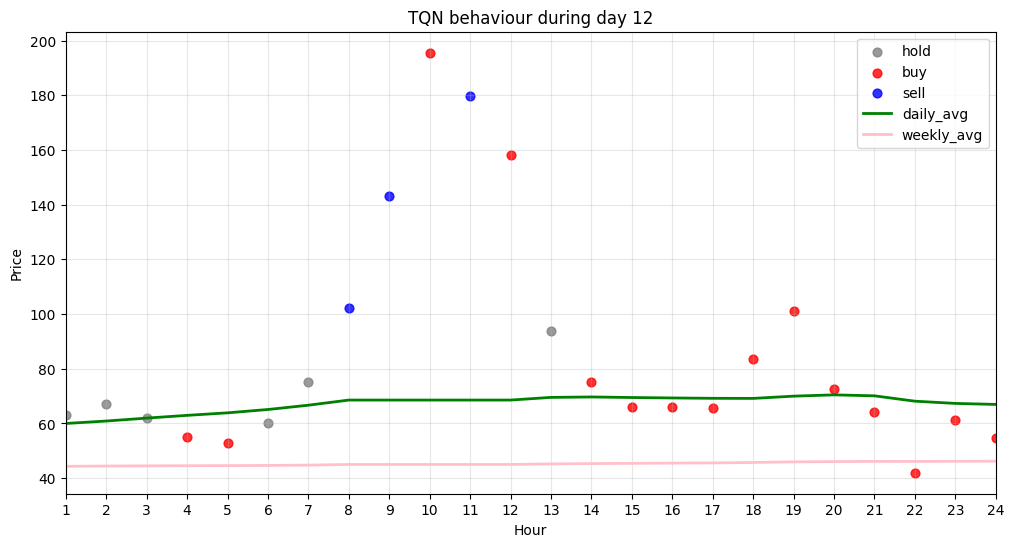

In [14]:
plot_behaviour(day_12, 12)

In [10]:
day_rewards =  df[['day', 'reward']].groupby('day').sum()

# Get the day with the highest reward
highest_day = day_rewards.idxmax()
highest_reward = day_rewards.max()

print("Day with the highest reward:", highest_day)
print("Highest reward amount:", highest_reward)

Day with the highest reward: reward    562.0
dtype: float64
Highest reward amount: reward    43.7
dtype: float64


In [11]:
day_562 = df[(df['day'] == 562)]
day_562

,day,hour,storage,price,daily_avg,weekly_avg,action,reward
13464,562.0,1.0,0.0,18.72,22.156667,22.436548,buy,0.36
13465,562.0,2.0,10.0,16.62,22.350833,22.455804,buy,2.46
13466,562.0,3.0,20.0,13.94,22.254583,22.466964,buy,2.57
13467,562.0,4.0,30.0,11.36,20.598750,22.470000,buy,2.66
13468,562.0,5.0,40.0,10.67,20.259583,22.454613,buy,2.68
13469,562.0,6.0,50.0,10.75,19.889167,22.396548,buy,2.67
13470,562.0,7.0,60.0,10.57,19.595000,22.339375,buy,2.67
13471,562.0,8.0,70.0,13.07,19.443333,22.316369,buy,2.55
13472,562.0,9.0,80.0,18.11,19.574167,22.330119,buy,0.10
13473,562.0,10.0,90.0,46.34,19.574167,22.330119,sell,5.33


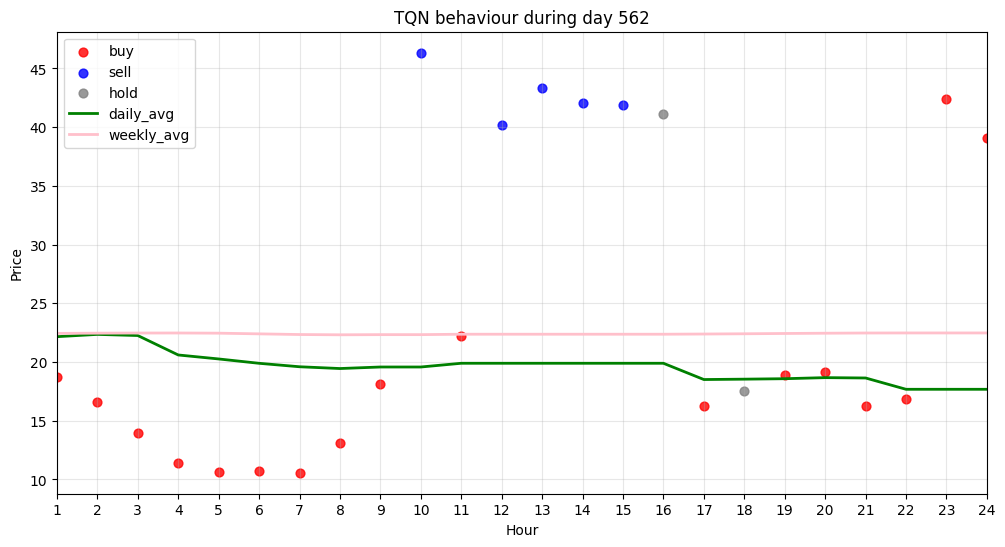

In [15]:
plot_behaviour(day_562, 562)